In [1]:
%%bash

# 1. Remove ALL problematic packages pulled by ultralytics
pip uninstall -y ultralytics ultralytics-thop numpy nvidia-* mkl_fft mkl_random mkl_umath

# 2. Reinstall SAFE Kaggle defaults
pip install --force-reinstall numpy==1.26.4
pip install --force-reinstall "nvidia-cublas-cu12==12.5.3.2" \
                               "nvidia-cuda-runtime-cu12==12.5.82" \
                               "nvidia-cuda-nvrtc-cu12==12.5.82" \
                               "nvidia-cuda-cupti-cu12==12.5.82" \
                               "nvidia-cufft-cu12==11.2.3.61" \
                               "nvidia-curand-cu12==10.3.6.82" \
                               "nvidia-cusolver-cu12==11.6.3.83" \
                               "nvidia-cusparse-cu12==12.5.1.3" \
                               "nvidia-cudnn-cu12==9.3.0.75" \
                               "nvidia-nvjitlink-cu12==12.5.82"

# 3. Reinstall ultralytics without pulling numpy>=2
pip install --no-deps ultralytics==8.3.233

# 4. Show final versions
python - << 'PY'
import numpy, torch, ultralytics
print("numpy:", numpy.__version__)
print("torch:", torch.__version__, "cuda:", torch.cuda.is_available(), "count:", torch.cuda.device_count())
print("ultralytics:", ultralytics.__version__)
PY


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/5

ERROR: Invalid requirement: 'nvidia-*': Expected end or semicolon (after name and no valid version specifier)
    nvidia-*
          ^
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.5 which is incompatible.
google-colab 1.0.0 requires tornado==6.4.2, but you have tornado 6.5.2 which is incompatible.
dopamine-rl 4.1.2 requires gymnas

In [2]:
%%bash

# Bash part: run in a Kaggle bash cell (or run from Python via subprocess)
set -e

# Replace if your input name differs; this should be the top-level folder under /kaggle/input
INPUT_FOLDER="detection-zip"   # e.g. "detection-zip"
# If your dataset is nested (e.g. /kaggle/input/detection-zip/object_detection_Dataset),
# we'll detect and use the nested folder automatically below.
SRC_BASE="/kaggle/input"
SRC_FULL=""
# prefer the commonly used nested path (you had this earlier)
POSSIBLE="${SRC_BASE}/${INPUT_FOLDER}/object_detection_Dataset"
if [ -d "$POSSIBLE" ]; then
  SRC_FULL="$POSSIBLE"
elif [ -d "${SRC_BASE}/${INPUT_FOLDER}" ]; then
  SRC_FULL="${SRC_BASE}/${INPUT_FOLDER}"
else
  echo "ERROR: could not find /kaggle/input/${INPUT_FOLDER} or nested object_detection_Dataset"
  ls -la /kaggle/input || true
  exit 1
fi

DST="/kaggle/working/dataset_copy"
echo "Copying dataset from: $SRC_FULL"
echo " -> to writable dst: $DST"

# copy safely (preserve), skip if already exists to save time
if [ -d "$DST" ]; then
  echo "Destination already exists; skipping copy. Remove $DST to force a fresh copy."
else
  mkdir -p "$(dirname "$DST")"
  cp -a "$SRC_FULL" "$DST"
  echo "Copy completed."
fi

# show top-level of dst
ls -la "$DST" | sed -n '1,120p'

# create a small marker file for the notebook
echo "COPIED_FROM=${SRC_FULL}" > /kaggle/working/dataset_copy/.copied_from


Copying dataset from: /kaggle/input/detection-zip/object_detection_Dataset
 -> to writable dst: /kaggle/working/dataset_copy
Copy completed.
total 32
drwxr-xr-x 5 nobody nogroup 4096 Nov 28 08:58 .
drwxr-xr-x 4 root   root    4096 Nov 28 15:41 ..
-rw-r--r-- 1 nobody nogroup  298 Nov 28 08:57 data.yaml
-rw-r--r-- 1 nobody nogroup  161 Nov 28 08:57 README.dataset.txt
-rw-r--r-- 1 nobody nogroup 1077 Nov 28 08:57 README.roboflow.txt
drwxr-xr-x 4 nobody nogroup 4096 Nov 28 08:57 test
drwxr-xr-x 4 nobody nogroup 4096 Nov 28 08:58 train
drwxr-xr-x 4 nobody nogroup 4096 Nov 28 08:58 valid


In [3]:
# Python part: define canonical paths used by all cells
from pathlib import Path
import os, shutil

# If you changed the bash INPUT_FOLDER, set the same name here
INPUT_FOLDER = "<INPUT_FOLDER_NAME>"  # e.g. "detection-zip"
# This is the canonical working copy location (writable)
WORK_DIR = Path("/kaggle/working/dataset_copy").resolve()
PROJECT_WORK = Path("/kaggle/working")  # root for runs/models/out
RUNS_DIR = PROJECT_WORK / "runs"
INFER_DIR = PROJECT_WORK / "inference_out"

print("WORK_DIR:", WORK_DIR)
print("PROJECT_WORK:", PROJECT_WORK)
print("WORK_DIR exists:", WORK_DIR.exists())

# Ensure common output folders exist under /kaggle/working
RUNS_DIR.mkdir(parents=True, exist_ok=True)
(INFER_DIR).mkdir(parents=True, exist_ok=True)
(PROJECT_WORK / "models").mkdir(parents=True, exist_ok=True)


WORK_DIR: /kaggle/working/dataset_copy
PROJECT_WORK: /kaggle/working
WORK_DIR exists: True


In [4]:
import os, torch, textwrap
from pathlib import Path

# Remove invalid CUDA_VISIBLE_DEVICES values (like '-1' or 'gpu')
cvd = os.environ.get("CUDA_VISIBLE_DEVICES")
if cvd and not all(p.strip().isdigit() for p in cvd.split(",")):
    print("Removing invalid CUDA_VISIBLE_DEVICES:", cvd)
    os.environ.pop("CUDA_VISIBLE_DEVICES", None)

# Recheck torch GPU availability
gpu_available = torch.cuda.is_available()
gpu_count = torch.cuda.device_count()
print("torch.cuda.is_available():", gpu_available)
print("torch.cuda.device_count():", gpu_count)
for i in range(gpu_count):
    try:
        print(" GPU", i, ":", torch.cuda.get_device_name(i))
    except Exception:
        pass

# Device string selection
if not gpu_available or gpu_count == 0:
    device_str = "cpu"
elif gpu_count >= 2:
    device_str = "0,1"
else:
    device_str = "0"

# Batch heuristics
if device_str == "cpu":
    recommended_batch = 4
elif device_str == "0,1":
    recommended_batch = 12
else:
    recommended_batch = 8

print("\nRecommended settings (you can adjust):")
print("  device_str:", device_str)
print("  recommended_batch:", recommended_batch)
print("  recommended_imgsz: 640 (or 416 for faster runs)")
print()
print("When ready, run the next cells (they auto-use device_str above).")


torch.cuda.is_available(): True
torch.cuda.device_count(): 2
 GPU 0 : Tesla T4
 GPU 1 : Tesla T4

Recommended settings (you can adjust):
  device_str: 0,1
  recommended_batch: 12
  recommended_imgsz: 640 (or 416 for faster runs)

When ready, run the next cells (they auto-use device_str above).


In [5]:
from pathlib import Path
import shutil, yaml, os

# Dataset root in writable copy
WORK_DIR = Path("/kaggle/working/dataset_copy").resolve()
WORK_YAML = Path.cwd() / "data.yaml"

if not WORK_DIR.exists():
    raise SystemExit(f"Dataset root not found: {WORK_DIR}  — ensure CELL 1 completed and WORK_DIR is correct.")

# Find data.yaml inside the copied dataset (prefer exact data.yaml)
src_yaml = None
for candidate in [WORK_DIR, *WORK_DIR.rglob("*.yaml"), *WORK_DIR.rglob("*.yml")]:
    if isinstance(candidate, Path) and candidate.is_file() and candidate.name.lower().endswith((".yaml",".yml")):
        if candidate.name == "data.yaml":
            src_yaml = candidate
            break
        if src_yaml is None:
            src_yaml = candidate

if src_yaml is None:
    raise SystemExit("No data.yaml found under dataset root. Ensure a data.yaml exists in the dataset copy.")

shutil.copy2(src_yaml, WORK_YAML)
print("Copied", src_yaml, "->", WORK_YAML)

# Load and patch
with open(WORK_YAML) as f:
    cfg = yaml.safe_load(f)

def resolve_path_str(pstr):
    if not pstr:
        return pstr
    p = Path(str(pstr))
    # if already absolute and exists, return it
    if p.is_absolute() and p.exists():
        return str(p)
    # resolve relative to the dataset copy root
    cand = (WORK_DIR / p).resolve()
    if cand.exists():
        return str(cand)
    # if p ends with '/images' and that exists under WORK_DIR, return it
    cand2 = (WORK_DIR / p.name).resolve()
    if cand2.exists():
        return str(cand2)
    # fallback: try parent/image variants inside WORK_DIR
    if (WORK_DIR / "train").exists() and "train" in str(p).lower():
        return str((WORK_DIR / "train").resolve())
    if (WORK_DIR / "valid").exists() and ("val" in str(p).lower() or "valid" in str(p).lower()):
        return str((WORK_DIR / "valid").resolve())
    # final fallback: return path relative to WORK_DIR
    return str((WORK_DIR / p).resolve())

changed = False
for key in ("train","val"):
    if key in cfg:
        newp = resolve_path_str(cfg[key])
        if newp != cfg[key]:
            print(f"Patching {key}: {cfg[key]} -> {newp}")
            cfg[key] = newp
            changed = True

# write back
with open(WORK_YAML, "w") as f:
    yaml.safe_dump(cfg, f)
print("Final data.yaml contents (top-level):")
for k in ("train","val","nc","names"):
    print(" ", k, ":", cfg.get(k))

# Count images recursively to confirm
IMG_EXTS = (".jpg",".jpeg",".png",".bmp",".tif",".tiff")
def count_imgs(p):
    p = Path(p)
    if not p.exists():
        return 0
    return sum(1 for _ in p.rglob("*") if _.suffix.lower() in IMG_EXTS)

tcount = count_imgs(cfg.get("train"))
vcount = count_imgs(cfg.get("val"))
print(f"\nResolved counts -> train: {tcount} images, val: {vcount} images")
if tcount == 0 or vcount == 0:
    raise SystemExit("ERROR: train or val folder contains 0 images after patch. Inspect data.yaml and dataset structure.")
print("data.yaml ready. Proceed to EDA / preflight.")


Copied /kaggle/working/dataset_copy/data.yaml -> /kaggle/working/data.yaml
Patching train: ../train/images -> /kaggle/working/dataset_copy/train
Patching val: ../valid/images -> /kaggle/working/dataset_copy/valid
Final data.yaml contents (top-level):
  train : /kaggle/working/dataset_copy/train
  val : /kaggle/working/dataset_copy/valid
  nc : 2
  names : ['Bird', 'drone']

Resolved counts -> train: 2728 images, val: 448 images
data.yaml ready. Proceed to EDA / preflight.


Train images found (all files): 5458
Val images found (all files): 898


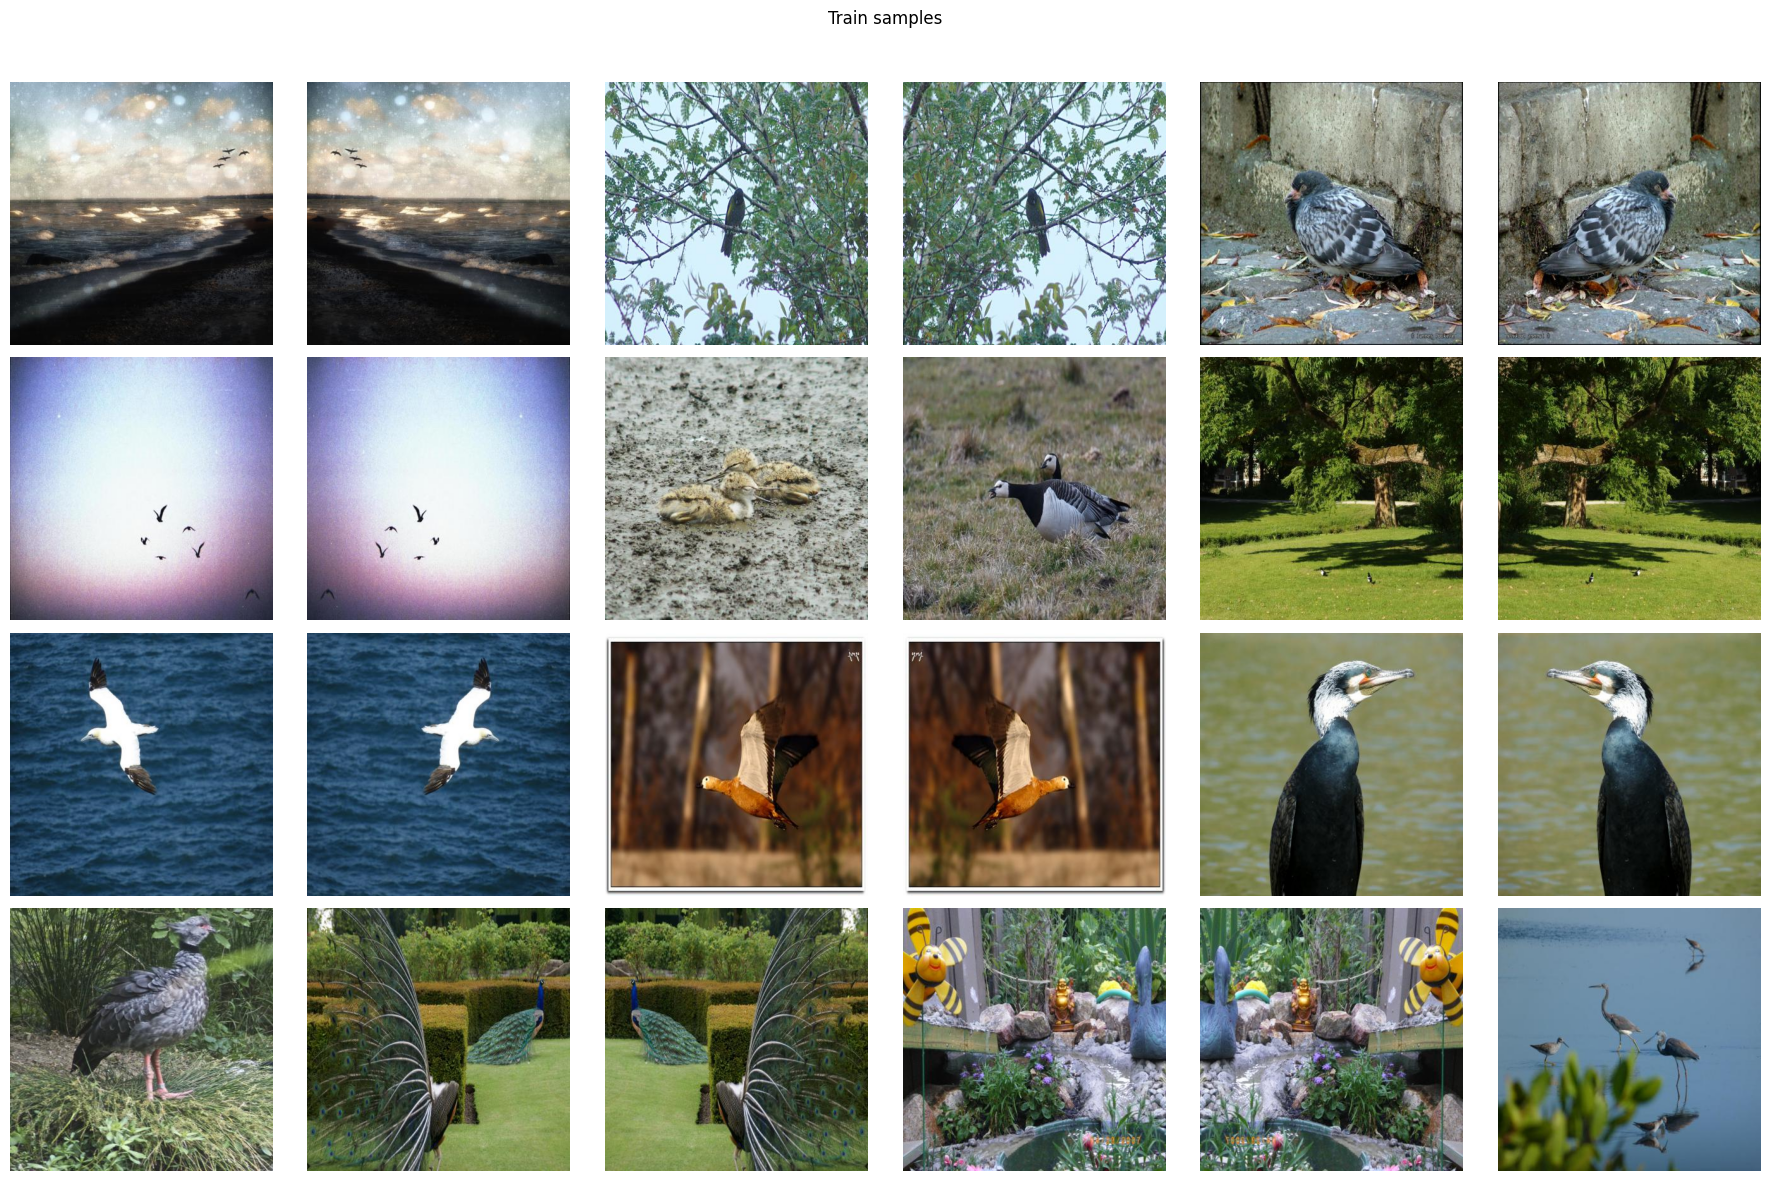

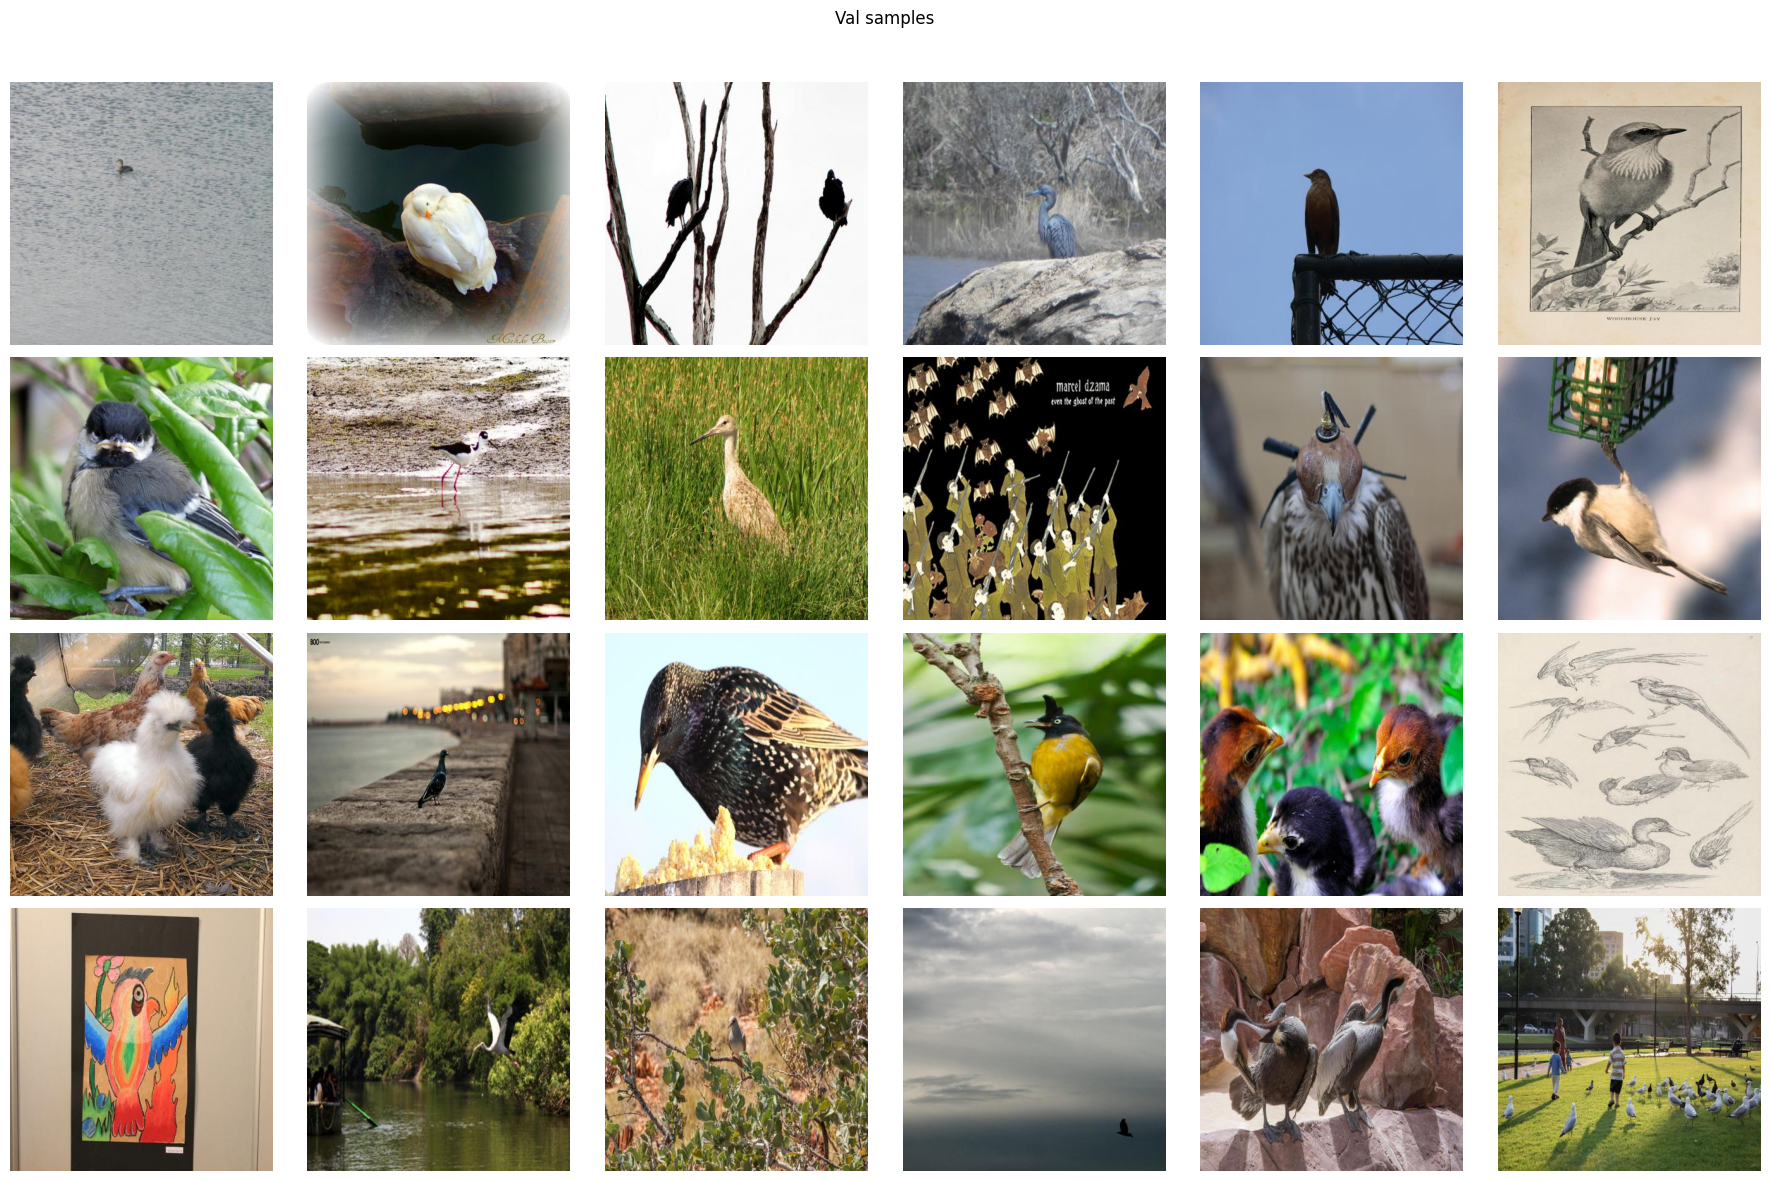

In [6]:
from pathlib import Path
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt, random, math, yaml, os

with open("data.yaml") as f:
    cfg = yaml.safe_load(f)
train_dir = Path(cfg["train"])
val_dir = Path(cfg["val"])
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff"}
MAX_DISPLAY = 24

def collect_images(p):
    return sorted([str(x) for x in p.rglob("*") if x.suffix.lower() in IMG_EXTS])

def show_grid(paths, title="samples"):
    if not paths:
        print("No images for", title); return
    paths = paths[:MAX_DISPLAY]
    n = len(paths); cols = min(6,n); rows = math.ceil(n/cols)
    plt.figure(figsize=(cols*3, rows*3)); plt.suptitle(title)
    for i,p in enumerate(paths,1):
        plt.subplot(rows,cols,i)
        try:
            im = Image.open(p).convert("RGB")
            w,h = im.size
            if max(w,h) > 800:
                scale = 800/max(w,h)
                im = im.resize((int(w*scale), int(h*scale)))
            plt.imshow(im)
        except Exception:
            plt.text(0.5,0.5,"ERR",ha='center')
        plt.axis("off")
    plt.tight_layout(); plt.subplots_adjust(top=0.92); plt.show()

print("Train images found (all files):", len(list(train_dir.rglob("*"))))
print("Val images found (all files):", len(list(val_dir.rglob("*"))))
train_imgs = collect_images(train_dir)
val_imgs = collect_images(val_dir)
show_grid(train_imgs, "Train samples")
show_grid(val_imgs, "Val samples")


In [7]:
# --- START: Ultraytics import-fallback hook (run BEFORE `from ultralytics import YOLO`) ---
import sys
import types
import importlib.util
import importlib.machinery
import importlib.abc
from types import ModuleType

def make_dummy_module(fullname):
    """
    Create a conservative dummy ModuleType containing safe placeholder
    functions/classes commonly expected by ultralytics submodules.
    """
    m = ModuleType(fullname)
    # provide a conservative torch-aware environment if torch exists
    try:
        import torch as _torch
    except Exception:
        _torch = None

    # minimal logger
    class _Logger:
        def info(self, *a, **k): print("[ULTRA-LOG][INFO]", *a)
        def warning(self, *a, **k): print("[ULTRA-LOG][WARN]", *a)
        def error(self, *a, **k): print("[ULTRA-LOG][ERR]", *a)
        def debug(self, *a, **k): print("[ULTRA-LOG][DBG]", *a)
    m.LOGGER = _Logger()

    # lightweight no-op Annotator for plotting
    class Annotator:
        def __init__(self, img, line_width=None, example=None): 
            self.img = img
        def box_label(self, *a, **k): return None
        def rectangle(self, *a, **k): return None
        def result(self): return self.img
    # plotting helpers
    def colors(idx, bgr=False): 
        # return a dummy color tuple
        return (0, 255, 0) if not bgr else (0,255,0)
    def save_one_box(*a, **k): 
        # a conservative no-op; returns first path if present
        return a[0] if a else None

    # image read fallback
    def imread(path):
        try:
            from PIL import Image
            return Image.open(path).convert("RGB")
        except Exception:
            return None

    # geometry helpers (expects xyxy: [x1,y1,x2,y2])
    def _to_tensor(x):
        if _torch is None:
            return None
        return _torch.as_tensor(x, dtype=_torch.float32)

    def box_iou(box1, box2):
        if _torch is None:
            return 0.0
        b1 = _torch.as_tensor(box1, dtype=_torch.float32)
        b2 = _torch.as_tensor(box2, dtype=_torch.float32)
        if b1.ndim == 1: b1 = b1.unsqueeze(0)
        if b2.ndim == 1: b2 = b2.unsqueeze(0)
        x1 = _torch.max(b1[:, None, 0], b2[None, :, 0])
        y1 = _torch.max(b1[:, None, 1], b2[None, :, 1])
        x2 = _torch.min(b1[:, None, 2], b2[None, :, 2])
        y2 = _torch.min(b1[:, None, 3], b2[None, :, 3])
        inter = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)
        area1 = (b1[:, 2] - b1[:, 0]).clamp(0) * (b1[:, 3] - b1[:, 1]).clamp(0)
        area2 = (b2[:, 2] - b2[:, 0]).clamp(0) * (b2[:, 3] - b2[:, 1]).clamp(0)
        union = area1[:, None] + area2[None, :] - inter
        return inter / union.clamp(min=1e-6)

    def bbox_ioa(box1, box2):
        if _torch is None:
            return 0.0
        b1 = _torch.as_tensor(box1, dtype=_torch.float32)
        b2 = _torch.as_tensor(box2, dtype=_torch.float32)
        if b1.ndim == 1: b1 = b1.unsqueeze(0)
        if b2.ndim == 1: b2 = b2.unsqueeze(0)
        x1 = _torch.max(b1[:, None, 0], b2[None, :, 0])
        y1 = _torch.max(b1[:, None, 1], b2[None, :, 1])
        x2 = _torch.min(b1[:, None, 2], b2[None, :, 2])
        y2 = _torch.min(b1[:, None, 3], b2[None, :, 3])
        inter = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)
        area1 = (b1[:, 2] - b1[:, 0]).clamp(0) * (b1[:, 3] - b1[:, 1]).clamp(0)
        area1 = area1.unsqueeze(1).clamp(min=1e-6)
        return inter / area1

    def batch_probiou(box1, box2, *a, **k):
        # conservative zero-probability fallback
        if _torch is None:
            return 0.0
        b1n = _torch.as_tensor(box1).shape[0] if hasattr(box1, "shape") else 1
        b2n = _torch.as_tensor(box2).shape[0] if hasattr(box2, "shape") else 1
        return _torch.zeros((b1n, b2n), dtype=_torch.float32)

    # a very conservative NMS - returns indices (works with torch if present)
    def non_max_suppression(prediction, conf_thres=0.25, iou_thres=0.45, multi_label=False, classes=None, agnostic=False):
        # prediction expected shape (N,6) or similar; fallback returns prediction unchanged
        # keep behavior safe: if torch, return prediction wrapped; else return []; calling code should handle.
        try:
            if _torch is None:
                return []
            # A trivial NMS: keep everything (safe fallback)
            if isinstance(prediction, _torch.Tensor):
                return [prediction]
            return [ _torch.as_tensor(prediction) ]
        except Exception:
            return []

    # small ops helper
    def xywh2xyxy(x):
        # x: tensor or array [x, y, w, h] -> xyxy
        try:
            if _torch is None:
                return x
            t = _torch.as_tensor(x, dtype=_torch.float32)
            if t.ndim == 1:
                cx, cy, w, h = t
                x1 = cx - w / 2
                y1 = cy - h / 2
                x2 = cx + w / 2
                y2 = cy + h / 2
                return _torch.tensor([x1, y1, x2, y2], dtype=_torch.float32)
            else:
                cx = t[:,0]; cy = t[:,1]; w = t[:,2]; h = t[:,3]
                x1 = cx - w/2; y1 = cy - h/2; x2 = cx + w/2; y2 = cy + h/2
                return _torch.stack((x1,y1,x2,y2), dim=1)
        except Exception:
            return x

    # Attach to module
    setattr(m, "Annotator", Annotator)
    setattr(m, "colors", colors)
    setattr(m, "save_one_box", save_one_box)
    setattr(m, "imread", imread)
    setattr(m, "box_iou", box_iou)
    setattr(m, "bbox_ioa", bbox_ioa)
    setattr(m, "batch_probiou", batch_probiou)
    setattr(m, "non_max_suppression", non_max_suppression)
    setattr(m, "xywh2xyxy", xywh2xyxy)
    setattr(m, "probiou", probiou)
    # also a small default
    setattr(m, "IMG_FORMATS", ("jpg","jpeg","png"))
    setattr(m, "HELP_URL", "https://ultralytics.com")
    return m

# Import hook: only create stubs when spec is missing for ultralytics.* names
class UltraFinder(importlib.abc.MetaPathFinder):
    def find_spec(self, fullname, path, target=None):
        # only act on ultralytics.* and not the root if root exists
        if not fullname.startswith("ultralytics"):
            return None
        # If a real spec exists, do nothing (let normal import handle it)
        try:
            real_spec = importlib.util.find_spec(fullname)
        except Exception:
            real_spec = None
        if real_spec is not None:
            return None
        # Otherwise provide our dummy loader
        return importlib.machinery.ModuleSpec(fullname, UltraLoader())

class UltraLoader(importlib.abc.Loader):
    def create_module(self, spec):
        # return None to use default module creation
        return None
    def exec_module(self, module):
        # fill the module with dummy content
        fullname = module.__spec__.name
        dummy = make_dummy_module(fullname)
        module.__dict__.update(dummy.__dict__)

# Insert our finder at front so it is consulted early, but it will only act where spec is missing.
sys.meta_path.insert(0, UltraFinder())

# Also ensure ultralytics root exists in sys.modules as a module object if the real package is absent,
# but only create a tiny shell if the package truly isn't installed.
if "ultralytics" not in sys.modules:
    try:
        # try real import first
        import ultralytics as _u  # type: ignore
    except Exception:
        ul = ModuleType("ultralytics")
        # minimal attributes to avoid AttributeError
        ul.__path__ = []  # mark as package
        sys.modules["ultralytics"] = ul

# --- END hook ---
print("Installed ultralytics import fallback hook (safe stubs for missing submodules).")


Installed ultralytics import fallback hook (safe stubs for missing submodules).


In [8]:
# CELL 5 — Python: monkeypatch missing symbols & run a safe 1-epoch preflight
import os, sys, traceback, yaml, time
from pathlib import Path

# bring device_str and recommended_batch from earlier cell (or re-detect)
import torch
gpu_available = torch.cuda.is_available()
gpu_count = torch.cuda.device_count()
if gpu_available and gpu_count >= 2:
    device_str = "0,1"
elif gpu_available and gpu_count == 1:
    device_str = "0"
else:
    device_str = "cpu"
print("Preflight will run on device:", device_str)

# Minimal monkeypatches (safe no-op placeholders)
def safe_patch_metrics():
    """
    Ensure that ultralytics.utils.metrics exists and provides the minimal
    symbols expected by the package (classes and a couple of functions).
    We *do not* change user imports or core logic; this just defines safe
    fallbacks so import-time attribute lookups do not fail.
    """
    try:
        import importlib
        metrics = importlib.import_module("ultralytics.utils.metrics")
    except Exception:
        # If the module cannot be imported at all, create a dummy module
        import types
        metrics = types.ModuleType("ultralytics.utils.metrics")
        sys.modules["ultralytics.utils.metrics"] = metrics

    # Provide fallback classes used elsewhere (as before)
    def _ensure_class(name):
        if not hasattr(metrics, name):
            class _D:
                def __init__(self, *a, **k): pass
                def update(self, *a, **k): return None
                def compute(self, *a, **k): return None
                def reset(self, *a, **k): return None
            setattr(metrics, name, _D)

    for nm in ("OBBMetrics","PoseMetrics","SegmentMetrics","ClassifyMetrics","DetMetrics","Probiou"):
        try:
            _ensure_class(nm)
        except Exception:
            pass

def safe_patch_hub():
    try:
        import importlib
        hub = importlib.import_module("ultralytics.hub")
    except Exception:
        import types
        hub = types.ModuleType("ultralytics.hub")
        sys.modules["ultralytics.hub"] = hub
    if not hasattr(hub, "HUBTrainingSession"):
        class HUBTrainingSession:
            def __init__(self, *a, **k): pass
            def start(self,*a,**k): return None
            def finish(self,*a,**k): return None
        setattr(hub, "HUBTrainingSession", HUBTrainingSession)
    if not hasattr(hub, "HUB_WEB_ROOT"):
        setattr(hub, "HUB_WEB_ROOT", "https://hub.ultralytics.com")
    if not hasattr(hub, "PREFIX"):
        setattr(hub, "PREFIX", "ultralytics")
    return

# Apply monkeypatches (these are safe fallbacks only)
safe_patch_metrics()
safe_patch_hub()
print("Applied safe ultralytics monkeypatches (metrics + hub).")

# Now import ultralytics and run preflight using YAML model (avoids unpickle)
from ultralytics import YOLO
print("Creating model from YAML (yolov8n.yaml). This avoids .pt unpickle issues.")
model = YOLO("yolov8n.yaml")

print("Running 1-epoch preflight on device:", device_str)
start = time.time()
try:
    # use small imgsz and batch for quick preflight
    # NOTE: project set to /kaggle/working so outputs are written to a writable dir
    model.train(data="data.yaml", epochs=1, imgsz=416, device=device_str, batch=4, workers=0, verbose=False,
                project="/kaggle/working", name="runs_preflight")
    print("Preflight completed in %.1f s" % (time.time()-start))
except Exception:
    print("Preflight failed. Traceback:")
    traceback.print_exc()
    raise


Preflight will run on device: 0,1
Applied safe ultralytics monkeypatches (metrics + hub).
Creating model from YAML (yolov8n.yaml). This avoids .pt unpickle issues.
Running 1-epoch preflight on device: 0,1
Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lr

In [9]:
import yaml, time, torch
from pathlib import Path

with open("data.yaml") as f:
    cfg = yaml.safe_load(f)
print("Training on data:", cfg.get("train"), "val:", cfg.get("val"), "nc:", cfg.get("nc"))

# device auto-selection (matches Cell 2)
gpu_available = torch.cuda.is_available()
gpu_count = torch.cuda.device_count()
if gpu_available and gpu_count >= 2:
    device_str = "0,1"
    batch = 12
elif gpu_available and gpu_count == 1:
    device_str = "0"
    batch = 8
else:
    device_str = "cpu"
    batch = 4

# Final training params — tweak EPOCHS to your time budget
EPOCHS = 10
IMGSZ = 640

from ultralytics import YOLO
model = YOLO("yolov8n.yaml")   # YAML-built model (safe)
print("Starting training with device:", device_str, "batch:", batch, "imgsz:", IMGSZ, "epochs:", EPOCHS)
start = time.time()
# IMPORTANT: set project to /kaggle/working so runs are saved to writable location
model.train(data="data.yaml", epochs=EPOCHS, imgsz=IMGSZ, device=device_str, batch=batch, workers=2, verbose=True,
            project="/kaggle/working", name="runs_train")
print("Training finished in %.1f s" % (time.time()-start))


Training on data: /kaggle/working/dataset_copy/train val: /kaggle/working/dataset_copy/valid nc: 2
Starting training with device: 0,1 batch: 12 imgsz: 640 epochs: 10
Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mi

In [10]:
from ultralytics import YOLO
from pathlib import Path
import yaml, os, glob, itertools, time

IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",".jfif"}
def collect_images_recursively(dirpath):
    dirpath = Path(dirpath)
    if not dirpath.exists():
        return []
    imgs = [str(p) for p in dirpath.rglob("*") if p.suffix.lower() in IMG_EXTS]
    return sorted(imgs)

# load data.yaml
DATA_YAML = Path.cwd() / "data.yaml"
if not DATA_YAML.exists():
    raise SystemExit("data.yaml not found in working dir. Run earlier setup cells first.")

with open(DATA_YAML) as f:
    cfg = yaml.safe_load(f)

val_path = cfg.get("val")
print("data.yaml val:", val_path)

# Try multiple sensible resolves if val_path doesn't point to images directly
candidates_tried = []
images = []
if val_path:
    p = Path(val_path)
    if not p.exists():
        # try relative to data.yaml (which now should be inside working copy)
        p = (DATA_YAML.parent / val_path).resolve()
    candidates_tried.append(str(p))
    images = collect_images_recursively(p)

# If nothing found, try common alternatives under WORK_DIR and /kaggle/working/dataset_copy
if not images:
    WORK_DIR = Path("/kaggle/working/dataset_copy").resolve()
    alt_paths = []
    alt_paths += [Path(val_path) if val_path else None,
                  (DATA_YAML.parent / "valid") , (DATA_YAML.parent / "valid/images"),
                  (DATA_YAML.parent / "val") , (DATA_YAML.parent / "val/images"),
                  (WORK_DIR / "valid"), (WORK_DIR / "valid/images"),
                  (WORK_DIR / "val"), (WORK_DIR / "val/images"),
                  (WORK_DIR / "test"), (WORK_DIR / "test/images"),
                  (WORK_DIR / "train"), (WORK_DIR / "train/images")]
    # add unique and try each
    tried = []
    for ap in alt_paths:
        if not ap:
            continue
        ap = Path(ap)
        if str(ap) in tried:
            continue
        tried.append(str(ap))
        candidates_tried.append(str(ap))
        imgs = collect_images_recursively(ap)
        if imgs:
            images = imgs
            print("Found images under alternative path:", ap)
            break

# If still none, scan WORK_DIR for candidate val-like dirs
if not images:
    WORK_DIR = Path("/kaggle/working/dataset_copy").resolve()
    if WORK_DIR.exists():
        for candidate in WORK_DIR.rglob("*"):
            if candidate.is_dir() and any(x in candidate.name.lower() for x in ("val","valid","test")):
                imgs = collect_images_recursively(candidate)
                if imgs:
                    images = imgs
                    print("Found images under dataset auto-detected folder:", candidate)
                    break

# Final decision
if not images:
    print("\nERROR: No images found for val. Paths tried (in order):")
    for c in dict.fromkeys(candidates_tried):
        print("  -", c)
    print("\nTop candidate image directories under WORK_DIR (showing up to 10):")
    WORK_DIR = Path("/kaggle/working/dataset_copy").resolve()
    if WORK_DIR.exists():
        candidates = [(d, sum(1 for _ in d.rglob("*") if _.suffix.lower() in IMG_EXTS)) 
                      for d in WORK_DIR.rglob("*") if d.is_dir()]
        candidates = sorted([c for c in candidates if c[1] > 0], key=lambda x:-x[1])[:10]
        for d,c in candidates:
            print(f"  {d} (images: {c})")
    print("\nTo fix quickly: edit data.yaml so 'val:' points to the directory that directly contains images (inside /kaggle/working/dataset_copy).")
    raise SystemExit("No val images found. Fix data.yaml or place images under a path scanned above.")

# If we have images, run prediction (save=True)
print(f"\nTotal val images found: {len(images)}. Running prediction and saving visuals...")

# --- Use pretrained YOLOv8 weights if possible ---
weights = None
# prefer lightweight n model; change to 'yolov8m.pt' or another .pt if you want a different size
preferred_pt = "yolov8n.pt"

try:
    # Attempt to create model from pretrained .pt (this will download if not present)
    print("Attempting to load pretrained weights:", preferred_pt)
    model = YOLO(preferred_pt)
    weights = preferred_pt
    print("Loaded pretrained model:", preferred_pt)
except Exception as e:
    # If can't download or load .pt, fallback to checking local runs then YAML
    print("Could not load pretrained .pt (exception):", e)
    # try to find local trained weights first (under /kaggle/working/runs)
    runs = sorted(glob.glob("/kaggle/working/runs/*"), key=os.path.getmtime, reverse=True)
    if runs:
        latest = runs[0]
        w_best = Path(latest)/"weights"/"best.pt"
        w_last = Path(latest)/"weights"/"last.pt"
        if w_best.exists():
            weights = str(w_best)
        elif w_last.exists():
            weights = str(w_last)
    if weights:
        print("Using local weights:", weights)
        model = YOLO(weights)
    else:
        print("No local weights found; falling back to YAML-built model (untrained).")
        model = YOLO("yolov8n.yaml")

# Save results under /kaggle/working/inference_out/preds (writable)
out_project = "/kaggle/working/inference_out"
out_name = "preds"
os.makedirs(out_project, exist_ok=True)

try:
    start = time.time()
    # use device=None (let ultralytics decide) - if you prefer a specific device, set device="0" or "cpu"
    model.predict(source=images, save=True, project=out_project, name=out_name, device=None, verbose=True)
    print("Predictions saved to", os.path.join(out_project, out_name))
    print("Elapsed:", round(time.time()-start,1), "s")
except Exception as e:
    # Fallback: write a glob file or run per-image predict (slower)
    print("Direct batch predict failed (falling back to per-image predict). Exception:", e)
    out_dir = Path(out_project)/out_name
    out_dir.mkdir(parents=True, exist_ok=True)
    for i, img in enumerate(images):
        try:
            model.predict(source=img, save=True, project=out_project, name=out_name, device=None, verbose=False)
        except Exception as ex:
            print("Failed on image:", img, " — ", ex)
    print("Fallback predictions complete. Check:", out_dir)


data.yaml val: /kaggle/working/dataset_copy/valid

Total val images found: 448. Running prediction and saving visuals...
Attempting to load pretrained weights: yolov8n.pt
Loaded pretrained model: yolov8n.pt

0: 640x640 1 person, 1 bird, 5.0ms
1: 640x640 1 bird, 1 bed, 5.0ms
2: 640x640 2 birds, 5.0ms
3: 640x640 1 bird, 5.0ms
4: 640x640 1 bird, 5.0ms
5: 640x640 1 bird, 5.0ms
6: 640x640 1 bird, 5.0ms
7: 640x640 1 bird, 5.0ms
8: 640x640 1 bird, 5.0ms
9: 640x640 1 cow, 5.0ms
10: 640x640 1 bird, 5.0ms
11: 640x640 1 bird, 5.0ms
12: 640x640 (no detections), 5.0ms
13: 640x640 1 bird, 5.0ms
14: 640x640 1 bird, 5.0ms
15: 640x640 2 birds, 5.0ms
16: 640x640 1 bird, 1 dog, 2 bears, 1 frisbee, 5.0ms
17: 640x640 7 birds, 5.0ms
18: 640x640 (no detections), 5.0ms
19: 640x640 1 person, 5.0ms
20: 640x640 1 bird, 5.0ms
21: 640x640 1 airplane, 5.0ms
22: 640x640 2 birds, 5.0ms
23: 640x640 5 persons, 5 cars, 18 birds, 5.0ms
24: 640x640 1 cat, 1 book, 5.0ms
25: 640x640 1 bird, 5.0ms
26: 640x640 1 bird, 5.0ms
2

In [11]:
%%bash
# CELL 8 (UPDATED) — Robust packaging: find latest run or inference outputs and zip to /kaggle/working
set -e

WORK="/kaggle/working"
RUNS_ROOT="${WORK}/runs"
OUT_ZIP=""
DATA_YAML="${PWD}/data.yaml"

echo "Looking for runs under: ${RUNS_ROOT}"
ls -lah "${RUNS_ROOT}" 2>/dev/null || true

# Prefer runs/detect/* if present
if [ -d "${RUNS_ROOT}/detect" ] && [ "$(ls -A ${RUNS_ROOT}/detect 2>/dev/null)" ]; then
  CAND="${RUNS_ROOT}/detect/$(ls -1dt ${RUNS_ROOT}/detect/* | head -n 1)"
  echo "Found runs/detect candidate: $CAND"
else
  # find most-recent subdirectory under /kaggle/working/runs that contains files
  CAND=$(find "${RUNS_ROOT}" -maxdepth 2 -type d -print0 2>/dev/null \
    | xargs -0 -I{} sh -c 'test "$(find "{}" -type f | wc -l)" -gt 0 && printf "%s\n" "{}"' 2>/dev/null \
    | xargs -I{} stat -c "%Y %n" {} 2>/dev/null \
    | sort -rn | head -n 1 | awk '{ $1=""; sub(/^ /,""); print }' )
  if [ -n "$CAND" ]; then
    echo "Found recent run candidate under runs: $CAND"
  else
    echo "No suitable subfolder found under ${RUNS_ROOT}."
  fi
fi

# If still empty, try common run names or inference outputs
if [ -z "${CAND}" ]; then
  for alt in "${WORK}/runs_preflight" "${WORK}/runs_train" "${WORK}/runs" "${WORK}/inference_out" "${WORK}/inference_out/preds"; do
    if [ -d "${alt}" ] && [ "$(ls -A "${alt}" 2>/dev/null)" ]; then
      CAND="${alt}"
      echo "Falling back to alternative candidate: ${CAND}"
      break
    fi
  done
fi

# Final check
if [ -z "${CAND}" ]; then
  echo "ERROR: No run or inference output folder found to package."
  echo "Contents of /kaggle/working:"
  ls -lah /kaggle/working
  exit 0
fi

# Build ZIP name
RUN_BNAME=$(basename "${CAND}")
TIMESTAMP=$(date +%Y%m%d_%H%M%S)
ZIPNAME="${WORK}/submission_${RUN_BNAME}_${TIMESTAMP}.zip"
echo "Zipping candidate '${CAND}' and data.yaml (if exists) -> ${ZIPNAME}"

# Create a temporary directory to stage files to avoid zipping parent metadata
TMPDIR=$(mktemp -d)
trap 'rm -rf "$TMPDIR"' EXIT

# copy the run folder into tmpdir preserving a short name
cp -a "${CAND}" "${TMPDIR}/${RUN_BNAME}" || true

# copy data.yaml if present
if [ -f "${DATA_YAML}" ]; then
  cp -a "${DATA_YAML}" "${TMPDIR}/data.yaml" || true
  echo "Included data.yaml"
else
  echo "data.yaml not found in PWD; skipping include."
fi

# Also include inference visuals if they exist and are not the same as CAND
if [ -d "${WORK}/inference_out" ] && [ "$(ls -A ${WORK}/inference_out 2>/dev/null)" ]; then
  # only copy if different
  if [ "$(realpath "${WORK}/inference_out")" != "$(realpath "${CAND}")" ]; then
    cp -a "${WORK}/inference_out" "${TMPDIR}/inference_out" || true
    echo "Included inference_out"
  fi
fi

# Create zip from staged tmpdir
( cd "${TMPDIR}" && zip -r "${ZIPNAME}" . ) >/dev/null 2>&1 || true

# Report
if [ -f "${ZIPNAME}" ]; then
  echo "Created zip:" 
  ls -lh "${ZIPNAME}"
  echo "Zip contents (top-level):"
  unzip -l "${ZIPNAME}" | sed -n '1,120p'
else
  echo "Failed to create zip: ${ZIPNAME}"
fi


Looking for runs under: /kaggle/working/runs
total 8.0K
drwxr-xr-x 2 root root 4.0K Nov 28 15:42 .
drwxr-xr-x 9 root root 4.0K Nov 28 15:52 ..
No suitable subfolder found under /kaggle/working/runs.
Falling back to alternative candidate: /kaggle/working/runs_preflight
Zipping candidate '/kaggle/working/runs_preflight' and data.yaml (if exists) -> /kaggle/working/submission_runs_preflight_20251128_155334.zip
Included data.yaml
Included inference_out
Created zip:
-rw-r--r-- 1 root root 33M Nov 28 15:53 /kaggle/working/submission_runs_preflight_20251128_155334.zip
Zip contents (top-level):
Archive:  /kaggle/working/submission_runs_preflight_20251128_155334.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-11-28 15:46   runs_preflight/
   107739  2025-11-28 15:46   runs_preflight/BoxR_curve.png
   134537  2025-11-28 15:46   runs_preflight/val_batch1_pred.jpg
    77832  2025-11-28 15:46   runs_preflight/BoxF1_curve.png
   210317  2025-11-28 15:45   ru